#### Euler's Method

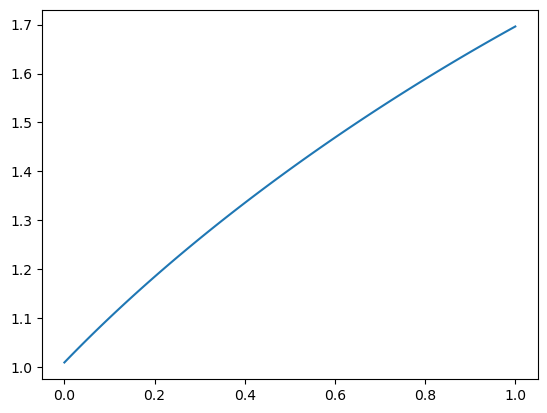

In [22]:
import numpy as np
import matplotlib.pyplot as plt
def euler(f, y_init, a, b, h):
    n = int((b - a) // h)
    y = []
    y_n = y_init
    for i  in range(1, n+1):
        y_n = y_n + h * f(a + h * i, y_n)
        y.append(y_n)
    return y

def f(x, y):
    return y - 2 * x / y


a, b, h = 0, 1, 0.01
y = euler(f, 1, a, b, h)
n = int((b - a) // h)
x = np.linspace(a, b, n)
plt.plot(x, y )

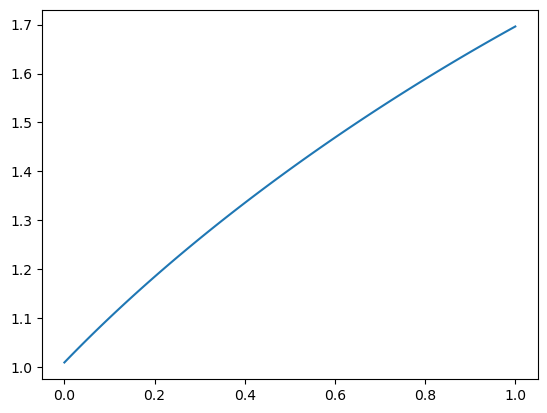

In [30]:
## 隐式欧拉

def euler_implict(f, y_init, a, b, h):
    n = int((b - a) // h)
    y = []
    y_explict = y_init
    for i  in range(1, n+1):
        # 这一步要找到一个合适的y_n
        y_implict = y_explict + h * f(a + h * i, y_explict)
        y_explict = y_implict
        while True:
            temp = y_implict + h * f(a + h * i, y_implict)
            if abs(temp - y_implict) < 1e-2:
                break
            y_implict = temp
        y.append(y_explict)
    return y

a, b, h = 0, 1, 0.01
y = euler_implict(f, 1, a, b, h)
n = int((b - a) // h)
x = np.linspace(a, b, n)
plt.plot(x, y )